### 모델의 정확도가 가지는 문제점

In [77]:
def classifier_A(x):
    return 0

In [78]:
import numpy as np
from sklearn.datasets import load_iris

iris_ds=load_iris()
biased_iris_ds=iris_ds['data'][1:51]
biased_iris_target=iris_ds['target'][1:51]

print(biased_iris_ds[:5])

[[4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]]


In [79]:
print(biased_iris_target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [80]:
result=[]
for x in biased_iris_ds:
    result.append(classifier_A(x))

print('분류 결과: ')
print(np.array(result))

분류 결과: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [81]:
from sklearn.metrics import accuracy_score

score=accuracy_score(biased_iris_target, result)
print("classifier_A(x)의 분류 성능: ", score)

classifier_A(x)의 분류 성능:  0.98


### 데이터의 편향과 데이터 증강강

In [82]:
import numpy as np
from sklearn.datasets import load_iris

iris_ds=load_iris()
balanced_iris_ds=iris_ds['data'][:100]
balanced_iris_target=iris_ds['target'][:100]

result=[]
for x in balanced_iris_ds:
    result.append(classifier_A(x))

print("엉터리 분류기의 분류 결과: ")
print(np.array(result))

엉터리 분류기의 분류 결과: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [83]:
from sklearn.metrics import accuracy_score

print("엉터리 분류기 classifier_A(x)의 분류 성능: ")
accuracy_score(balanced_iris_target, result)

엉터리 분류기 classifier_A(x)의 분류 성능: 


0.5

### 사이킷런의 성능 지표 함수들들

In [84]:
target=np.array([0]*10+[1]*10)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [85]:
pred=np.array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1])
pred

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1])

In [86]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, pred)

array([[7, 3],
       [2, 8]], dtype=int64)

In [87]:
from sklearn.metrics import precision_score, recall_score
print('정밀도: ', precision_score(target, pred))
print('재현율: ', recall_score(target, pred))

from sklearn.metrics import accuracy_score, f1_score
print("정확도: ", accuracy_score(target, pred))
print("f1점수: ", f1_score(target, pred))

정밀도:  0.7272727272727273
재현율:  0.8
정확도:  0.75
f1점수:  0.7619047619047619


### 다양한 스케일러를 알아보자자

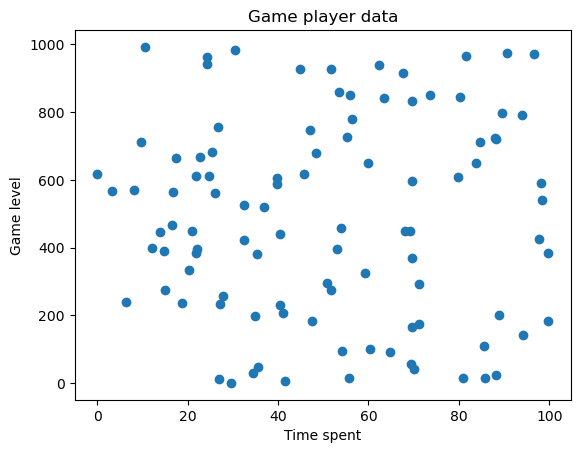

In [88]:
import numpy as np
import matplotlib.pyplot as plt

game_level=np.random.rand(100)*1000
game_time=np.random.rand(100)*100

plt.title('Game player data')
plt.xlabel('Time spent')
plt.ylabel('Game level')
plt.scatter(game_time, game_level)

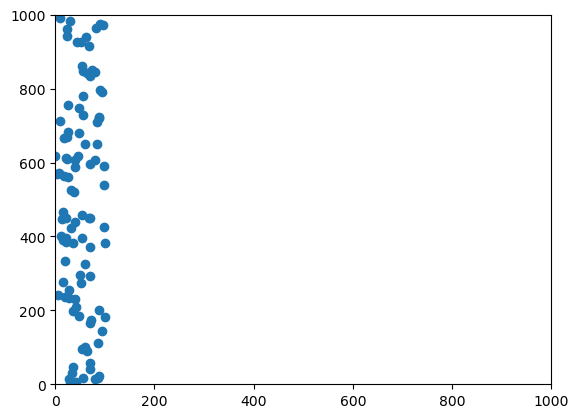

In [89]:
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.scatter(game_time, game_level)

In [90]:
gamer_data=np.array(list(zip(game_time, game_level)))
print(gamer_data)

[[8.95763596e+01 7.96542987e+02]
 [4.75370223e+01 1.83434790e+02]
 [5.63275572e+01 7.79691000e+02]
 [6.95516086e+01 5.96850158e+02]
 [1.39331454e+01 4.45832753e+02]
 [6.04417379e+01 9.99749158e+01]
 [5.39841091e+01 4.59248892e+02]
 [2.03061225e+01 3.33708611e+02]
 [9.42853571e+01 1.42866818e+02]
 [5.98865466e+01 6.50888473e+02]
 [6.94784933e+01 5.64115790e+01]
 [8.80467839e+01 7.21998772e+02]
 [6.24354048e+01 9.38552709e+02]
 [2.95633686e+01 7.78765841e-01]
 [1.05494260e+01 9.92211559e+02]
 [4.56534570e+01 6.17481510e+02]
 [2.18440437e+01 6.11653160e+02]
 [4.16509948e+01 7.06630522e+00]
 [8.83280259e+01 2.30624250e+01]
 [3.24345021e+01 5.24774660e+02]
 [1.22087955e+01 3.99860972e+02]
 [3.56297838e+01 4.66656632e+01]
 [9.06828442e+01 9.73755519e+02]
 [2.72132249e+01 2.32771340e+02]
 [6.47690121e+01 9.06064345e+01]
 [5.20376995e-02 6.18386009e+02]
 [3.52568856e+01 3.82461991e+02]
 [3.04781258e+01 9.83230886e+02]
 [1.64655853e+01 4.66762893e+02]
 [5.34089419e+01 8.59940407e+02]
 [4.848299

In [91]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(gamer_data)
n_data=scaler.transform(gamer_data)#gamer_data를 0~1사이 값으로 변환
n_data[:, 0].mean(), n_data[:, 1].mean()

(0.5090870046308847, 0.4889847763472459)

In [92]:
n_data[:, 0].min(), n_data[:, 0].max()

(0.0, 1.0)

In [93]:
n_data[:, 1].min(), n_data[:, 1].max()

(0.0, 0.9999999999999999)

In [94]:
import numpy as np

a=np.array([10, 8, 10, 8, 8, 4])
print("합계: ", a.sum())
print("평균: ", a.mean())
print("분산: ", a.var())
print("표준편차: ", a.std())

합계:  48
평균:  8.0
분산:  4.0
표준편차:  2.0


In [95]:
from sklearn.preprocessing import StandardScaler

standardScaler=StandardScaler()
standardScaler.fit(gamer_data)
gamer_data_scaled=standardScaler.transform(gamer_data)

gamer_data_scaled[:, 0].std(), gamer_data_scaled[:, 1].std()

(1.0, 0.9999999999999998)

In [96]:
gamer_data_scaled[:, 0].mean(), gamer_data_scaled[:, 1].mean()

(7.638334409421077e-16, -5.817568649035821e-16)

### 학습 데이터에만 최적화된 신경망 개선하기: 드롭아웃
### 드롭아웃으로 과대적합을 예방방

In [97]:
import tensorflow as tf
import numpy as np
data=np.arange(1, 11).reshape(2, 5).astype(np.float32)
print(data)

[[ 1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10.]]


In [98]:
layer=tf.keras.layers.Dropout(.3, input_shape=(2, ))
outputs=layer(data, training=True)
print(outputs)

tf.Tensor(
[[ 1.4285715  2.857143   4.285714   5.714286   0.       ]
 [ 0.         0.        11.428572  12.857143  14.285715 ]], shape=(2, 5), dtype=float32)


c:\Users\sdh05\anaconda3\Lib\site-packages\keras\src\layers\regularization\dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [99]:
data=np.arange(1, 11).reshape(2, 5).astype(np.float32)
print(data)
print('data의 합:', np.sum(data))

[[ 1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10.]]
data의 합: 55.0


In [100]:
layer=tf.keras.layers.Dropout(.3, input_shape=(2, ))
outputs=layer(data, training=True)
print(outputs)
print("출력의 합: ", np.sum(outputs))

tf.Tensor(
[[ 0.         2.857143   4.285714   5.714286   7.1428576]
 [ 0.        10.         0.        12.857143  14.285715 ]], shape=(2, 5), dtype=float32)
출력의 합:  57.14286


In [101]:
layer=tf.keras.layers.Dropout(.5, input_shape=(2, ))
outputs=layer(data, training=True)
print(outputs)
print("출력의 합: ", np.sum(outputs))

tf.Tensor(
[[ 0.  4.  0.  0.  0.]
 [ 0. 14. 16. 18.  0.]], shape=(2, 5), dtype=float32)
출력의 합:  52.0


In [102]:
from tensorflow import keras

model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dropout(0,2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0,2),
    keras.layers.Dense(10, activation='softmax')
])

c:\Users\sdh05\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### 패션 mnist 데이터터

In [103]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [104]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels)=fashion_mnist.load_data()

In [105]:
print(train_images.shape)
print(train_labels)
print(test_images.shape)

(60000, 28, 28)
[9 0 0 ... 3 0 5]
(10000, 28, 28)


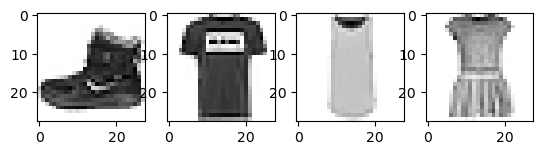

In [106]:
fig=plt.figure()
ax1=fig.add_subplot(1, 4, 1)
ax2=fig.add_subplot(1, 4, 2)
ax3=fig.add_subplot(1, 4, 3)
ax4=fig.add_subplot(1, 4, 4)

ax1.imshow(train_images[0], cmap='Greys')
ax2.imshow(train_images[1], cmap='Greys')
ax3.imshow(train_images[2], cmap='Greys')
ax4.imshow(train_images[3], cmap='Greys')

In [107]:
print(train_labels[:4])

[9 0 0 3]


In [108]:
mnist_lbl=['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_boot']
lables=train_labels[:4]
for i in train_labels:
    print('{}:{}'.format(i, mnist_lbl[i]))

9:Ankle_boot
0:T-shirt
0:T-shirt
3:Dress
0:T-shirt
2:Pullover
7:Sneaker
2:Pullover
5:Sandal
5:Sandal
0:T-shirt
9:Ankle_boot
5:Sandal
5:Sandal
7:Sneaker
9:Ankle_boot
1:Trouser
0:T-shirt
6:Shirt
4:Coat
3:Dress
1:Trouser
4:Coat
8:Bag
4:Coat
3:Dress
0:T-shirt
2:Pullover
4:Coat
4:Coat
5:Sandal
3:Dress
6:Shirt
6:Shirt
0:T-shirt
8:Bag
5:Sandal
2:Pullover
1:Trouser
6:Shirt
6:Shirt
7:Sneaker
9:Ankle_boot
5:Sandal
9:Ankle_boot
2:Pullover
7:Sneaker
3:Dress
0:T-shirt
3:Dress
3:Dress
3:Dress
7:Sneaker
2:Pullover
2:Pullover
6:Shirt
6:Shirt
8:Bag
3:Dress
3:Dress
5:Sandal
0:T-shirt
5:Sandal
5:Sandal
0:T-shirt
2:Pullover
0:T-shirt
0:T-shirt
4:Coat
1:Trouser
3:Dress
1:Trouser
6:Shirt
3:Dress
1:Trouser
4:Coat
4:Coat
6:Shirt
1:Trouser
9:Ankle_boot
1:Trouser
3:Dress
5:Sandal
7:Sneaker
9:Ankle_boot
7:Sneaker
1:Trouser
7:Sneaker
9:Ankle_boot
9:Ankle_boot
9:Ankle_boot
3:Dress
2:Pullover
9:Ankle_boot
3:Dress
6:Shirt
4:Coat
1:Trouser
1:Trouser
8:Bag
8:Bag
0:T-shirt
1:Trouser
1:Trouser
6:Shirt
8:Bag
1:Trouser
9:

Text(0, 0, 'Dress')

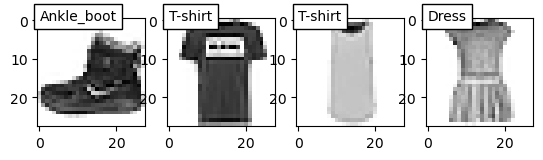

In [109]:
fig=plt.figure()
ax1=fig.add_subplot(1, 4, 1)
ax2=fig.add_subplot(1, 4, 2)
ax3=fig.add_subplot(1, 4, 3)
ax4=fig.add_subplot(1, 4, 4)

ax1.imshow(train_images[0], cmap='Greys')
ax2.imshow(train_images[1], cmap='Greys')
ax3.imshow(train_images[2], cmap='Greys')
ax4.imshow(train_images[3], cmap='Greys')

ax1.text(0, 0, mnist_lbl[train_labels[0]], bbox={'facecolor':'white'})
ax2.text(0, 0, mnist_lbl[train_labels[1]], bbox={'facecolor':'white'})
ax3.text(0, 0, mnist_lbl[train_labels[2]], bbox={'facecolor':'white'})
ax4.text(0, 0, mnist_lbl[train_labels[3]], bbox={'facecolor':'white'})

In [110]:
train_images, test_images=train_images/255, test_images/255
model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [111]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history=model.fit(train_images, train_labels, batch_size=64,
                  epochs=10, validation_split=0.25)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7200 - loss: 0.8170 - val_accuracy: 0.8319 - val_loss: 0.4789
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8345 - loss: 0.4581 - val_accuracy: 0.8591 - val_loss: 0.3944
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8513 - loss: 0.4030 - val_accuracy: 0.8550 - val_loss: 0.3889
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8628 - loss: 0.3739 - val_accuracy: 0.8691 - val_loss: 0.3550
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8672 - loss: 0.3607 - val_accuracy: 0.8672 - val_loss: 0.3663
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8714 - loss: 0.3501 - val_accuracy: 0.8799 - val_loss: 0.3299
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8778 - loss: 0.3320 - val_accuracy: 0.8786 - val_loss: 0.3440
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8799 - loss: 0.3223 - val_accuracy: 0.

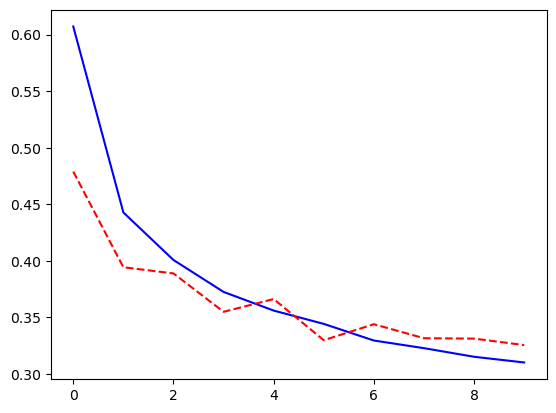

In [112]:
plt.plot(history.history['loss'], 'b-')
plt.plot(history.history['val_loss'], 'r--')

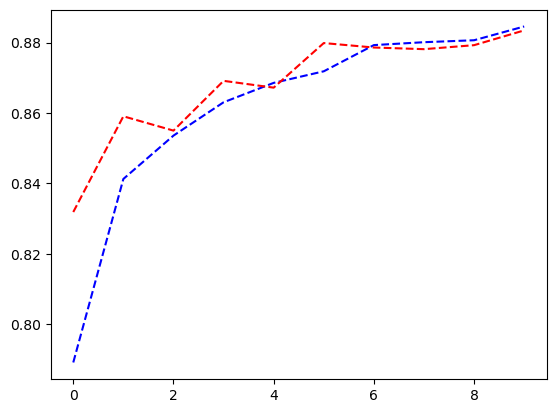

In [113]:
plt.plot(history.history['accuracy'], 'b--')
plt.plot(history.history['val_accuracy'], 'r--')

In [114]:
test_loss, test_acc=model.evaluate(test_images, test_labels, verbose=2)
print('테스트 정확도: ', test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.8752 - loss: 0.3472
테스트 정확도:  0.8751999735832214


랜덤 인덱스:  102


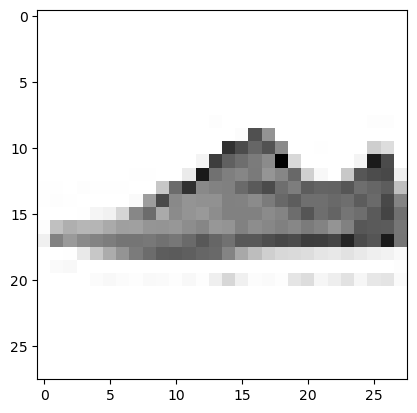

In [115]:
np.random.seed(42)
randIdx=np.random.randint(0, 1000)
print('랜덤 인덱스: ', randIdx)
plt.imshow(test_images[randIdx], cmap='Greys')

In [116]:
print('테스트용 이미지의 형태: ', test_images[randIdx].shape)
new_images=test_images[randIdx][np.newaxis, :, :]
print("테스트용 이미지를 모델에 입력하기 위한 형태: ")
test_images[randIdx].shape
print(new_images.shape)

yhat=model.predict(new_images)
print(yhat.round(3))

테스트용 이미지의 형태:  (28, 28)
테스트용 이미지를 모델에 입력하기 위한 형태: 
(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
[[0.    0.    0.    0.    0.    0.    0.    0.999 0.001 0.   ]]


In [117]:
yhat=np.argmax(model.predict(
    test_images[randIdx][np.newaxis, :, :]))

print('이미지에 대한 모델의 출력: ', yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
이미지에 대한 모델의 출력:  7


In [118]:
print("이지미에 대한 모델의 출력: ", mnist_lbl[yhat])

이지미에 대한 모델의 출력:  Sneaker


In [119]:
def plot_4images(images, labels):
    fig=plt.figure()
    ax1=fig.add_subplot(1, 4, 1)
    ax2=fig.add_subplot(1, 4, 2)
    ax3=fig.add_subplot(1, 4, 3)
    ax4=fig.add_subplot(1, 4, 4)

    ax1.imshow(images[0], cmap='Greys')
    ax2.imshow(images[1], cmap='Greys')
    ax3.imshow(images[2], cmap='Greys')
    ax4.imshow(images[3], cmap='Greys')

    ax1.text(0, 0, mnist_lbl[labels[0]], bbox={'facecolor':'white'})
    ax2.text(0, 0, mnist_lbl[labels[1]], bbox={'facecolor':'white'})
    ax3.text(0, 0, mnist_lbl[labels[2]], bbox={'facecolor':'white'})
    ax4.text(0, 0, mnist_lbl[labels[3]], bbox={'facecolor':'white'})

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
[9 2 1 1]


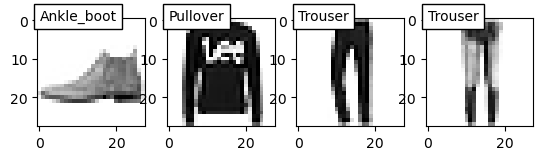

In [120]:
images=test_images[:4]
predictions=np.argmax(model.predict(images), axis=1)
print(predictions)
plot_4images(images, predictions)